# Imports

In [1]:
import numpy as np
import operator
from matplotlib import pyplot as plt
from scipy.stats import skewnorm


# Parameters that doesn't vary 

In [2]:
global cars, days, carlist, time, chargeeffect, numberoffails, chargenow ,critical, threshold, criticalthreshold, breakloop, minimum, middle, AFE, whenhomelist, failedsnapshot, daycounter, numberoffails

days= 1 #number of simulated days
cars= 100 # number of BEVs in simulation
carlist=[]
carhomelist=[]
time=0
hourlist=[]
daycounter=0 
MTL = 400 # maximal tranformer load - should be changed
OML = MTL * 0.5 # optimal maximal load on transformer
chargeeffect= (1-0.0905)  
diseffect=(1-0.2313)
numberoffails= 0
chargenow=[]
critical=[]
threshold = 0.1 
criticalthreshold=0.5 
breakloop= 0
minimum=[]
middle=[]
failedsnapshot=[]
listoffails=[]
numberoffails=0
whenhomelist=[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515, 525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645, 655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775, 785, 795, 805, 815, 825, 835, 845, 855, 865, 875, 885, 895, 905, 915, 925, 935, 945, 955, 965, 975, 985, 995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095, 1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205, 1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315, 1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425, 1435]

# Functions


In [3]:
#Hourly valure in kWh from households 
def definetimehourly():
    z=int(50)
    global hourlist, time
    h0 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z) + (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z) + (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h1 = ((skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z )+ (skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z)+(skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z))
    h2 = ((skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z)+(skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z)+(skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z))
    h3 = ((skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+ (skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z))
    h4 = ((skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z)+ (skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z)+(skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z))
    h5 = ((skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z)+ (skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z)+ (skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z))
    h6 = ((skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z)+(skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z) +(skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z))
    h7 = ((skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z)+ (skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z)+(skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z))
    h8 = ((skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z)+ (skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z)+ (skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z))
    h9 = ((skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z)+ (skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z)+ (skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z))
    h10 = ((skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z)+(skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z)+(skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z))
    h11 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+ (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+ (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h12 = ((skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z)+(skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z)+(skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z))
    h13 = ((skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z)+(skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z)+(skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z))
    h14 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h15 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h16 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h17 = ((skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z)+(skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z)+(skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z))
    h18 = ((skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z))
    h19 = ((skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z)+(skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z)+(skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z))
    h20 = ((skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z)+(skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z)+(skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z))
    h21 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h22 = ((skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z)+(skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z)+(skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z))
    h23 =((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    hourlist=[h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23]



In [4]:
def firstgeneration():
    global  carlist, cars, time, whenhomelist
    for x in range(cars):
        i={}
        i['car'] = x # Carnumber, which also maches place in original carlist
        i['BC'] = 62 # batterycapacity
        i['MCW'] = i['BC'] * 0.4 # Minimum charge wanted 
        i['SOC'] = 62*0.8 # State of charge in Kwh

        carlist.append(i)

In [5]:
def evdailyupdate():
     # Effect of charging- Should be corrected
    global carlist, cars, time, chargeeffect, whenhomelist
    for i in range(len(carlist)):
        carlist[i]['TWH'] = whenhomelist[(np.random.choice(np.arange(1, 145), p=[0.0068, 0.0078,0.0076,	0.0078,	0.0072, 0.0079 , 0.0075 ,0.0079, 0.0077,0.0073, 0.0071, 0.0067, 0.0075, 0.0074, 0.0072, 0.0075, 0.0081, 0.0090, 0.0088, 0.0088, 0.0091, 0.0093, 0.0098, 0.0120, 0.0116, 0.0113, 0.0123, 0.0126 , 0.0137, 0.0134, 0.0146, 0.0136, 0.0150, 0.0150, 0.0151, 0.0148, 0.0163, 0.0155, 0.0151, 0.0159, 0.0145, 0.0144, 0.0135, 0.0129, 0.0126, 0.0133, 0.0121, 0.0121, 0.0110, 0.0107, 0.0105, 0.0105, 0.0113, 0.0103, 0.0094, 0.0107, 0.0085, 0.0075, 0.0075, 0.0066, 0.0062, 0.0084, 0.0061, 0.0051, 0.0045, 0.0042, 0.0033, 0.0109, 0.0032, 0.0041, 0.0122, 0.0042, 0.0035, 0.0075, 0.0050, 0.0018, 0.0091, 0.0009, 0.0019, 0.0034, 0.0005, 0.0005, 0.0021, 0.0007, 0.0002, 0.0015, 0.0003, 0.0002, 0.0029, 0.0009, 0.0002, 0.0021, 0.0002, 0.0003, 0.0013, 0.0006, 0.0005, 0.0017, 0.0008, 0.0006, 0.0015, 0.0006, 0.0005, 0.0022, 0.0016, 0.0008, 0.0034, 0.0017, 0.0029, 0.0037, 0.0027, 0.0029, 0.0048, 0.0038, 0.0054, 0.0055, 0.0051, 0.0060, 0.0078, 0.0072, 0.0085, 0.0088, 0.0075, 0.0076, 0.0078, 0.0071, 0.0077, 0.0085, 0.0061, 0.0059, 0.0067, 0.0063, 0.0061, 0.0067, 0.0057, 0.0061, 0.0058, 0.0058, 0.0065, 0.0071, 0.0070, 0.0074, 0.0070, 0.0071])-1)]
        while carlist[i]['TWH']>= 600 : 
            carlist[i]['TWH'] = whenhomelist[(np.random.choice(np.arange(1, 145), p=[0.0068, 0.0078,0.0076,	0.0078,	0.0072, 0.0079 , 0.0075 ,0.0079, 0.0077,0.0073, 0.0071, 0.0067, 0.0075, 0.0074, 0.0072, 0.0075, 0.0081, 0.0090, 0.0088, 0.0088, 0.0091, 0.0093, 0.0098, 0.0120, 0.0116, 0.0113, 0.0123, 0.0126 , 0.0137, 0.0134, 0.0146, 0.0136, 0.0150, 0.0150, 0.0151, 0.0148, 0.0163, 0.0155, 0.0151, 0.0159, 0.0145, 0.0144, 0.0135, 0.0129, 0.0126, 0.0133, 0.0121, 0.0121, 0.0110, 0.0107, 0.0105, 0.0105, 0.0113, 0.0103, 0.0094, 0.0107, 0.0085, 0.0075, 0.0075, 0.0066, 0.0062, 0.0084, 0.0061, 0.0051, 0.0045, 0.0042, 0.0033, 0.0109, 0.0032, 0.0041, 0.0122, 0.0042, 0.0035, 0.0075, 0.0050, 0.0018, 0.0091, 0.0009, 0.0019, 0.0034, 0.0005, 0.0005, 0.0021, 0.0007, 0.0002, 0.0015, 0.0003, 0.0002, 0.0029, 0.0009, 0.0002, 0.0021, 0.0002, 0.0003, 0.0013, 0.0006, 0.0005, 0.0017, 0.0008, 0.0006, 0.0015, 0.0006, 0.0005, 0.0022, 0.0016, 0.0008, 0.0034, 0.0017, 0.0029, 0.0037, 0.0027, 0.0029, 0.0048, 0.0038, 0.0054, 0.0055, 0.0051, 0.0060, 0.0078, 0.0072, 0.0085, 0.0088, 0.0075, 0.0076, 0.0078, 0.0071, 0.0077, 0.0085, 0.0061, 0.0059, 0.0067, 0.0063, 0.0061, 0.0067, 0.0057, 0.0061, 0.0058, 0.0058, 0.0065, 0.0071, 0.0070, 0.0074, 0.0070, 0.0071])-1)] 
        carlist[i]['MCW'] = float(carlist[i]['BC']) * 0.4 #Minimum charge wanted
        carlist[i]['EUSE']=  float(skewnorm.rvs(4, loc=3.4, scale=3, size=1)) # hvor meget der bliver brugt hver dag
        carlist[i]['SOC'] = float(carlist[i]['SOC']) - float(carlist[i]['EUSE'])
        carlist[i]['MCP']= 11 # Max charge power  in KWH
        carlist[i]['MRP']= float(carlist[i]['MCP']) * chargeeffect # Max recivable power
        carlist[i]['TWD'] = int(skewnorm.rvs(10,loc=(((1440-carlist[i]['TWH'])/1.3)+carlist[i]['TWH'])-79.391, scale=100, size=None)) 
        while carlist[i]['TWD'] > 1440:
            carlist[i]['TWD'] = int(skewnorm.rvs(10,loc=(((1440-carlist[i]['TWH'])/1.3)+carlist[i]['TWH'])-79.391, scale=100, size=None))
        carlist[i]['TWDB'] = carlist[i]['TWD']-(float((carlist[i]['TWD']-carlist[i]['TWH'])*0.1)) +0.00001# Time when demanded - generate and apply buffer 
        carlist[i]['MUD'] = float(carlist[i]['TWDB'])- int(time) # minuts until full charge is demande
        carlist[i]['RMUD'] = (float(carlist[i]['TWD'])- int(time)) +0.000001
        carlist[i]['DBC'] =  np.random.normal(loc= 62*0.8 , scale=62*0.05, size=None) #skal findes med normalfordeling
        carlist[i]['RDC'] = float(carlist[i]['DBC'])-float(carlist[i]['SOC']) # REmaning demande charge in KWH
        carlist[i]['ACP'] = float((carlist[i]['RDC']/chargeeffect))/(float(carlist[i]['MUD'])/60) # Average charge power 
        
        

In [6]:
def evminutupdate():
    global carlist, cars, time, whenhomelist, chargeeffect
    for i in range(len(carlist)):
        carlist[i]['CCP'] = 0
        carlist[i]['MUD'] = float(carlist[i]['TWDB'])- int(time) # minuts until full charge is demanded
        carlist[i]['RDC'] = float(carlist[i]['DBC'])-float(carlist[i]['SOC']) # remaning demanded charge in KWH
        carlist[i]['RMUD'] = (float(carlist[i]['TWD'])- int(time)) +0.000001
        carlist[i]['RACP']= float((carlist[i]['RDC']/chargeeffect))/(float(carlist[i]['RMUD'])/60)
        carlist[i]['ACP'] = float((carlist[i]['RDC'])/(chargeeffect))/(float(carlist[i]['MUD'])/60) # Average charge power
        carlist[i]['LCS']= float(carlist[i]['MUD'])- ((float(carlist[i]['RDC'])/float(carlist[i]['MRP']))*60) # Latest charger start 
        carlist[i]['CAM'] = float(carlist[i]['ACP'])/float(carlist[i]['MRP']) #How close ACP is to MRP 
        carlist[i]['CDR'] = 0 #Current discharge rate
        carlist[i]['MDR'] = 11 #Maximum discharge rate 
        carlist[i]['CAD'] = float(carlist[i]['MDR'])-float(carlist[i]['CDR']) #Currently avalible for discharge


In [7]:
def V2G(i):
    x=0
    while critical[i]['CCP'] < critical[i]['MRP'] and x < (len(middle)):
        middle.sort(key=operator.itemgetter('CAM'))
        if middle[x]['CAD']>0:
            if middle[x]['CAD']*diseffect >= (critical[i]['MCP']-(critical[i]['CCP']/chargeeffect)):
                middle[x]['CDR'] += (critical[i]['MCP']-(critical[i]['CCP']/chargeeffect))/diseffect
                critical[i]['CCP'] = critical[i]['MRP']
                x+=1
            else:
                critical[i]['CCP'] += (middle[x]['CAD'] * diseffect) * chargeeffect
                middle[x]['CDR']= middle[x]['MDR']
                x+=1
        else:
            x+=1

In [8]:
def failedcam():
    global failedthisday, AFE
    for i in range(len(failedthisday)):
        if AFE > 0 and carlist[failedthisday[i]['car']]['RMUD'] > 0 and carlist[failedthisday[i]['car']]['RDC'] > 0 and carlist[failedthisday[i]['car']]['CCP'] == 0:
            if failedthisday[i]['MCP'] >= AFE: 
                carlist[failedthisday[i]['car']]['CCP'] = AFE* chargeeffect
                AFE= 0
            else:
                carlist[failedthisday[i]['car']]['CCP'] = carlist[failedthisday[i]['car']]['MRP']
                AFE = AFE - carlist[failedthisday[i]['car']]['MCP']

In [9]:
def criticacam():
    global critical, AFE
    for i in range(len(critical)):
        if AFE > 0 and carlist[critical[i]['car']]['MUD'] > 0 and carlist[critical[i]['car']]['RDC'] > 0 and carlist[critical[i]['car']]['CCP'] == 0 :
            if critical[i]['MCP'] >= AFE and AFE > 0: 
                carlist[critical[i]['car']]['CCP'] = AFE *chargeeffect
                AFE = 0
                V2G(i)
            else:
            
                carlist[critical[i]['car']]['CCP'] = carlist[critical[i]['car']]['MRP']
                AFE= AFE - carlist[critical[i]['car']]['MCP']

In [10]:
def chargenowcam():
    global chargenow, AFE
    for i in range(len(chargenow)):
        if AFE > 0 and carlist[chargenow[i]['car']]['MUD'] > 0 and carlist[chargenow[i]['car']]['RDC'] > 0 and carlist[chargenow[i]['car']]['CCP'] == 0:
            if chargenow[i]['MCP'] >= AFE and AFE > 0: 
                carlist[chargenow[i]['car']]['CCP'] = AFE*chargeeffect
                AFE= 0
            else:
                carlist[chargenow[i]['car']]['CCP'] = carlist[chargenow[i]['car']]['MRP']
                AFE = AFE - carlist[chargenow[i]['car']]['MCP']

In [11]:
def RACPminimum():
    global minimum, AFE, OML
    for i in range(len(minimum)):
        if AFE > 200 and carlist[minimum[i]['car']]['MUD']>0 and carlist[minimum[i]['car']]['RDC']> 0 and carlist[minimum[i]['car']]['CCP'] == 0:
            if minimum[i]['ACP'] >= AFE-200 and AFE-200 > 0: 
                carlist[minimum[i]['car']]['CCP'] = (AFE-200) * chargeeffect
                AFE= 200
            else:
                carlist[minimum[i]['car']]['CCP'] = carlist[minimum[i]['car']]['ACP'] * chargeeffect
                AFE = AFE - carlist[minimum[i]['car']]['ACP']

In [12]:
def RACPmiddle():
    global middle, AFE
    for i in range(len(middle)):
        if AFE > 200 and carlist[middle[i]['car']]['MUD'] > 0 and carlist[middle[i]['car']]['RDC'] > 0 and carlist[middle[i]['car']]['CCP'] == 0:
            if middle[i]['ACP'] >= AFE-200 and AFE-200 > 0: 
                carlist[middle[i]['car']]['CCP'] = (AFE-200)* chargeeffect
                AFE = 200
            else:
                carlist[middle[i]['car']]['CCP'] = carlist[middle[i]['car']]['ACP']*chargeeffect
                AFE = AFE - carlist[middle[i]['car']]['ACP']

# Algorithm

In [14]:
carlist=[]
failedsnapshot=[]
numberoffails=0
CHLlist=[]
EVUSELIST=[]
firstgeneration()

for x in range(days):
        
# things that reset every day:
    definetimehourly()
    carhomelist=[]
    fullcharged=[]
    failedthisday=[]
    failedthisdaynumber=[]
    SOCSUM=0
    DBCSUM=0
    time=0
    breakloop = 0 
    evdailyupdate()

    while time< 1440:

# executes at the start of each minut
        evminutupdate()  
        critical=[]
        chargenow =[]
        minimum=[]
        middle=[]

        CHL = float(np.random.normal(loc=float(hourlist[int((time/60))]), scale=1.0, size=None))
        CTL = CHL
        AFE = MTL-CHL

# looping through evs that arrive at home
        for i in range(len(carlist)):
            if int(time) == int(carlist[i]['TWH']):
                carhomelist.append(carlist[i])

        k=0 
        carshome= len(carhomelist)

        while k< len(carhomelist):
            if int(time) == int(carhomelist[k]['TWD']):
                carhomelist.remove(carhomelist[k])
                carshome=len(carhomelist)

            else:
                k+=1

# sorting evs that are home by which BEVs has higest CAM
        carhomelist.sort(key=operator.itemgetter('CAM'),reverse=True)

        for i in range(len(carhomelist)):
            if carhomelist[i]['car'] not in failedthisdaynumber and carhomelist[i]['SOC'] < carhomelist[i]['DBC']:
                if float(carhomelist[i]['ACP'])> float(carhomelist[i]['MCP']):
                    if float(carhomelist[i]['RACP'])> float(carhomelist[i]['MCP']):
                        failedthisdaynumber.append(int(carhomelist[i]['car']))
                        failedsnapshot.append(carlist)
                    else:
                        if carhomelist[i]['MCP'] >= AFE: 
                            carlist[carhomelist[i]['car']]['CCP'] = AFE * chargeeffect
                            AFE=0
                        else:
                            carlist[carhomelist[i]['car']]['CCP'] = carlist[carhomelist[i]['car']]['MRP']
                            AFE = AFE - carlist[carhomelist[i]['car']]['MCP']

            
        for i in range(len(carhomelist)):
            if carhomelist[i]['CAM'] > threshold:
                if carhomelist[i]['CAM'] > criticalthreshold:
                    critical.append(carhomelist[i])
                else:
                    chargenow.append(carhomelist[i])
            else: 
                if carhomelist[i]['MCW'] > carhomelist[i]['SOC']:
                    minimum.append(carhomelist[i])
                else:
                    middle.append(carhomelist[i])

        failedthisday.sort(key=operator.itemgetter('CAM'),reverse=True)
        critical.sort(key=operator.itemgetter('CAM'),reverse=True)
        chargenow.sort(key=operator.itemgetter('CAM'),reverse=True)
        middle.sort(key=operator.itemgetter('CAM'))
        minimum.sort(key=operator.itemgetter('SOC'),reverse=True)
    

        if len(failedthisday) > 0:
            failedcam()
        if len(critical) > 0:
            criticacam()
        if len(chargenow) > 0:
            chargenowcam()            
        if len(minimum)>0:
            RACPminimum()
        middle.sort(key=operator.itemgetter('CAM'),reverse=True)
        if len(middle) > 0 :
            RACPmiddle()

            
# Infomation is send out to all BEVs, and charging begins
        for i in range(len(carlist)):
            carlist[i]['SOC'] += (float(carlist[i]['CCP']))/ 60
            carlist[i]['SOC'] -= (float(carlist[i]['CDR']))/ 60

        CHLlist.append(CHL)
        EVUSELIST.append((((MTL-AFE)-CHL)+CHL))
        

#incrementing minuts by 1 
        time+=1

    for i in range(len(carlist)):
        if carlist[i]['DBC'] > carlist[i]['SOC']+0.1:
            failedthisday.append(carlist[i])
    if len(failedthisday)>0:
        numberoffails+=1
#printing resiult as percent of days failed
print((numberoffails/days)*100)

    

0.0


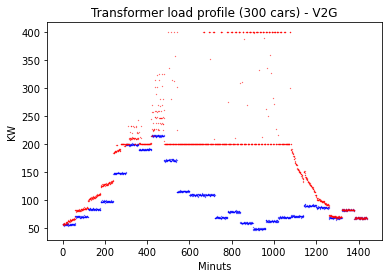

In [15]:
# To print transformer load profile set number of days to 1

minutlist=[]
for i in range(1440):
    minutlist.append(i)

x2points = np.array([EVUSELIST])
x1points = np.array([CHLlist])
ypoints = np.array([minutlist])
plt.plot(ypoints, x1points,'b', ypoints, x2points,'r',marker = '.', ms=0.5 )
plt.title(f"Transformer load profile ({int(cars)} cars) - V2G")
plt.xlabel("Minuts")
plt.ylabel("KW")
plt.show()